In [2]:
import numpy as np
import pandas as pd
import GPy
import time
import sys
import os
import pdb
import matplotlib.pyplot as plt

from context import aep
from context import load_data
from context import delete_blocks
from context import start_df
from context import save_df
from context import metrics
from thesis_work.plots import GP_figures
from thesis_work.plots import SGP_figures
from thesis_work.plots import DGP_figures

from baseline_models import full_GP_reg
from baseline_models import sparse_GP_reg
from aep_config import cont_optimization
from aep_config import aep_DGP_reg

default_dict = {'M': 50, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':100,
            'MB': 250, 'lr': 0.01, 'fixed_hyp': []}
os.getcwd()
%matplotlib notebook

# Load data: normalise, delete blocks

Dataset size:  5000  Test size:  2000.0
Training:  750


<IPython.core.display.Javascript object>


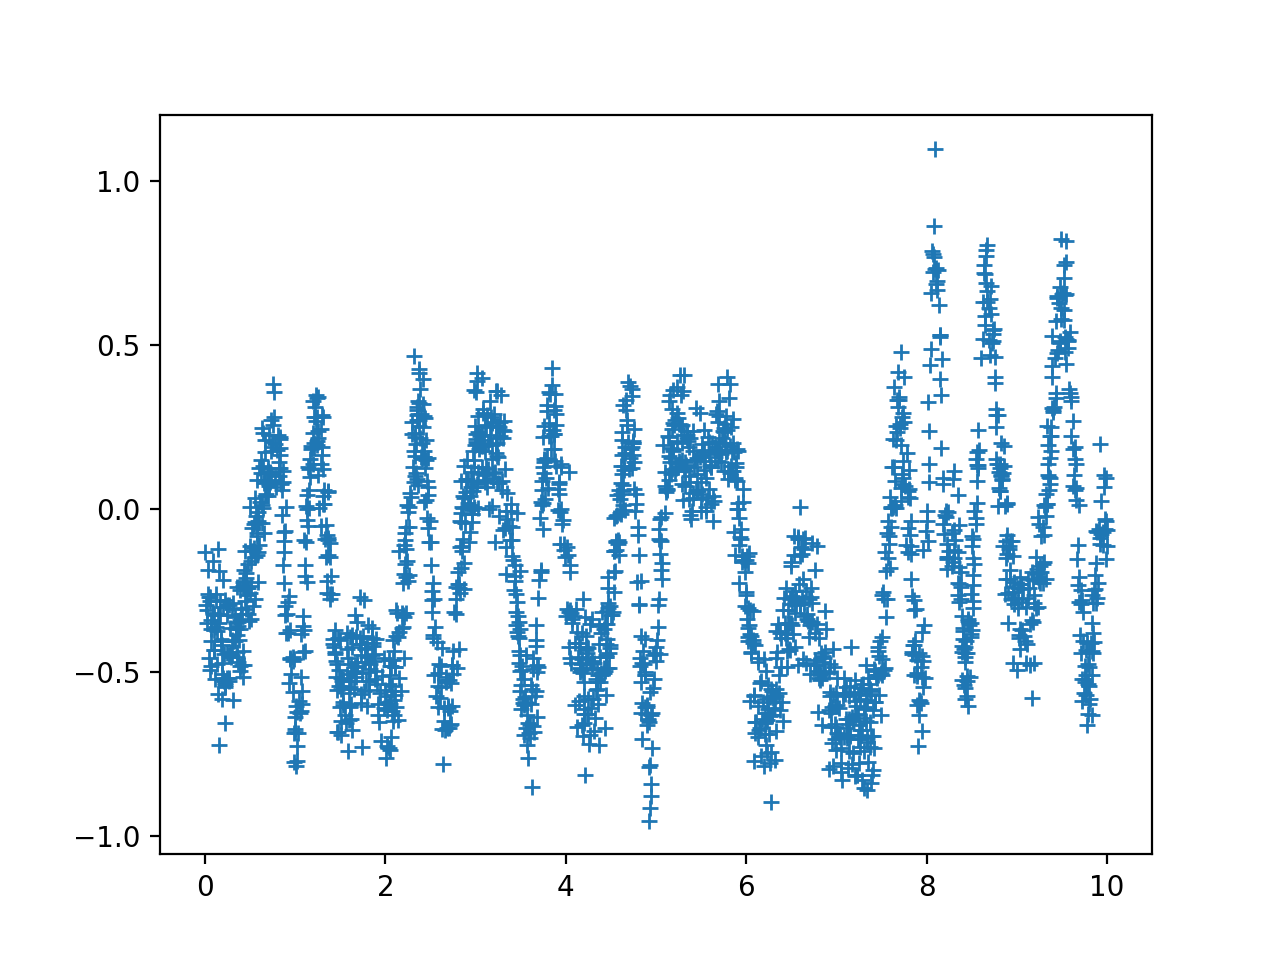

In [16]:
path = 'data/dgp_samples/old/sample_1.txt'
X_train, y_train, X_test, y_test = load_data(path, N_train=750, test=0.4, norm_out=False)
# X_test, y_test = delete_blocks(X_test, y_test,
#                                intervals=[2,4,8,9])
plt.figure()
plt.plot(X_test, y_test, '+')
plt.show()

## Sparse GP

create SGP model and optimize ...
Test MSE =0.024, NLL =-0.422


<IPython.core.display.Javascript object>


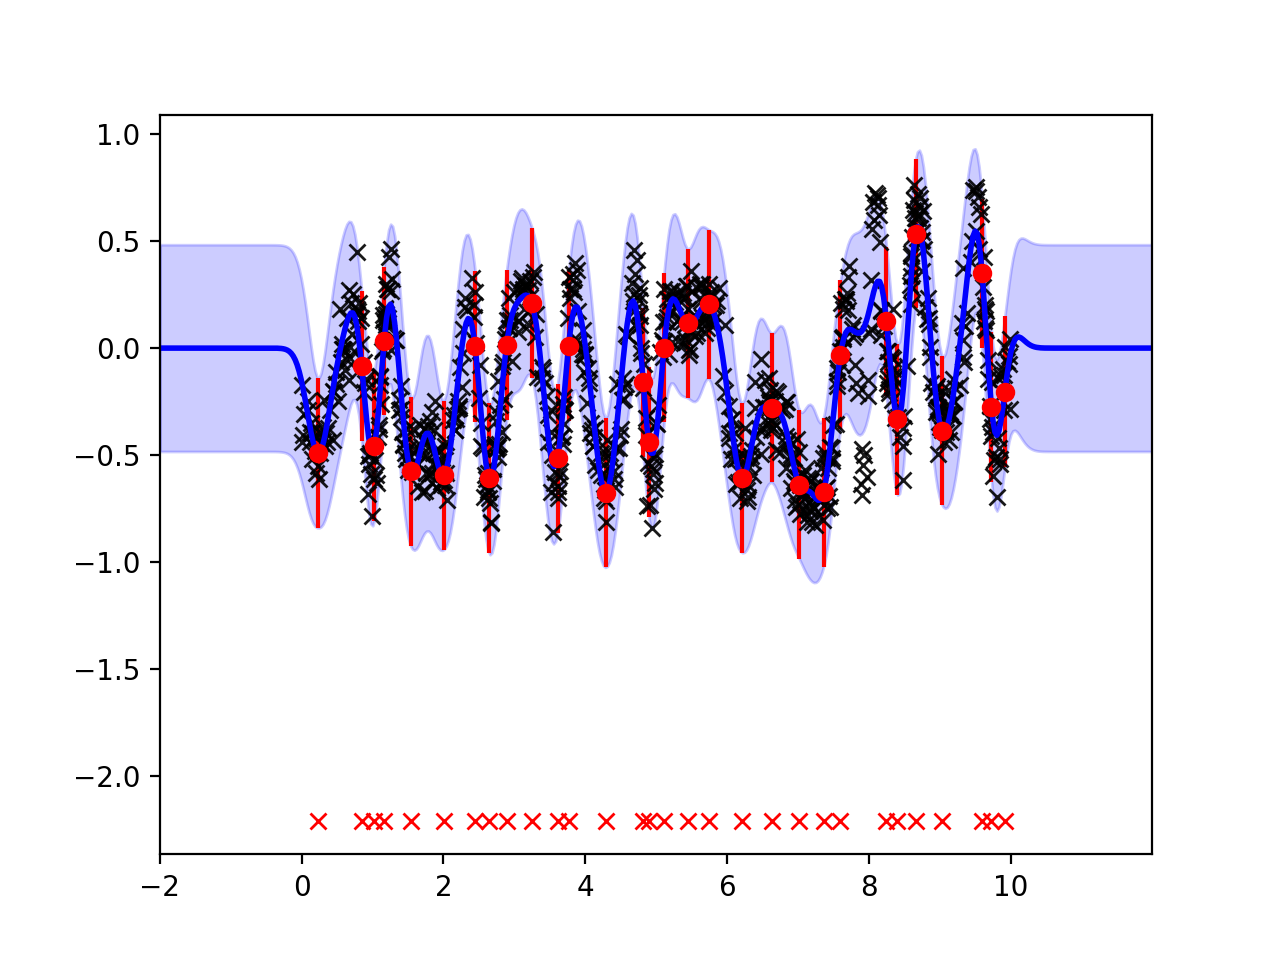

In [27]:
model_sgp, df = sparse_GP_reg(X_train, y_train, X_test, y_test, M=30)
fig = SGP_figures(model_sgp).plot()

# AEP Deep GPs

Create DGP model and optimize ...
Optimise with fixed:  ['zu_0', 'sf_0', 'ls_0', 'eta2_0', 'sn']
SGP greedy initialisation
Perform sparse GP regression
sf_0
sn
ls_0
eta2_0
zu_0
eta1_R_0
iter 0 	 obj 24.919
iter 50 	 obj 2.526
iter 100 	 obj 2.453
iter 150 	 obj 2.395
iter 200 	 obj 2.354
iter 250 	 obj 2.318
iter 300 	 obj 2.287
iter 350 	 obj 2.263
iter 400 	 obj 2.244
iter 450 	 obj 2.228
iter 500 	 obj 2.214
iter 550 	 obj 2.203
iter 600 	 obj 2.193
iter 650 	 obj 2.183
iter 700 	 obj 2.174
iter 750 	 obj 2.166
iter 800 	 obj 2.159
iter 850 	 obj 2.152
iter 900 	 obj 2.145
iter 950 	 obj 2.139
Test MSE= 0.069, NLL= 0.062, SN= 0.028


<IPython.core.display.Javascript object>


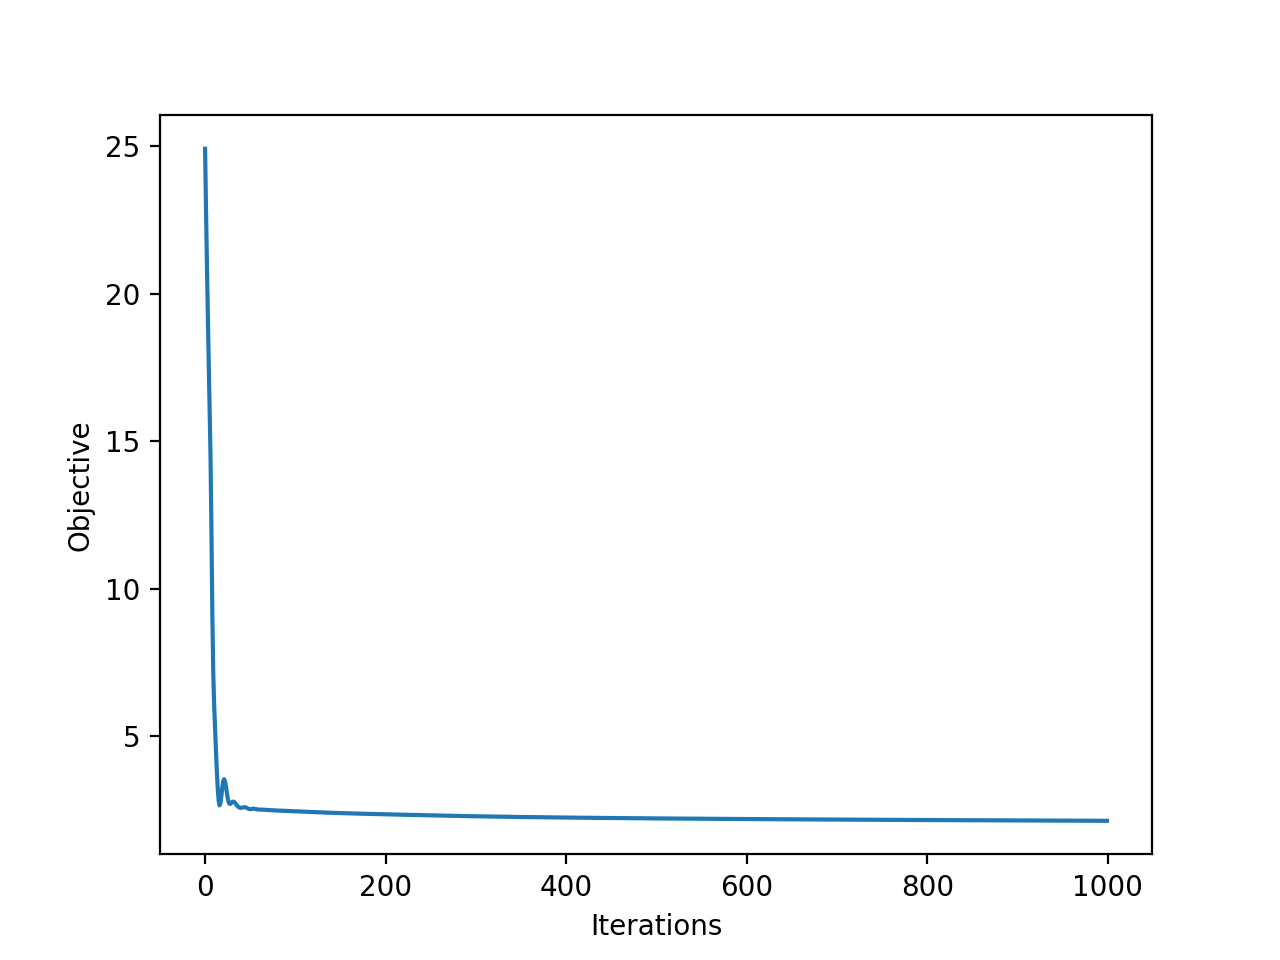

In [35]:
N_train = X_train.shape[0]
# ['zu_0', 'sf_0', 'ls_0', 'eta2_0', 'eta1_R_0']
config_dict = {'M': 30, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':1000,
            'MB': 750, 'lr': 0.01, 'fixed_hyp': ['zu_0', 'sf_0', 'ls_0', 'eta2_0','sn'],
            'init_type':'greedy'}

model, df, costs = aep_DGP_reg(X_train, y_train, X_test, y_test, 
				conf_dict= config_dict,
				return_cost=True)
fig0 = DGP_figures(model,conf_dict=config_dict).plot_cost(costs)

In [34]:
config_dict2 = {'M': 30, 'hidden_size': [2], 
			'optimizer':'adam', 'max_it':1000,
            'MB': 750, 'lr': 0.01, 'fixed_hyp': [],
            'init_type':'greedy'}
model, df = cont_optimization(model, X_test, y_test, conf_dict=config_dict2,
                              new_max_it=1000, return_cost=False)

iter 0 	 obj 1.938
iter 50 	 obj 1.962
iter 100 	 obj 1.948
iter 150 	 obj 1.944
iter 200 	 obj 1.941
iter 250 	 obj 1.939
iter 300 	 obj 1.937
iter 350 	 obj 1.935
iter 400 	 obj 1.934
iter 450 	 obj 1.933
iter 500 	 obj 1.932
iter 550 	 obj 1.931
iter 600 	 obj 1.950
iter 650 	 obj 1.940
iter 700 	 obj 1.935
iter 750 	 obj 1.934
iter 800 	 obj 1.934
iter 850 	 obj 1.933
iter 900 	 obj 1.932
iter 950 	 obj 1.932
Test MSE= 0.062, NLL= -0.050, SN= 0.028


main_folder = 'scores/'
save_df(main_folder, df, name=config_dict['init_type']+'-5')

### Fitting plots

<IPython.core.display.Javascript object>


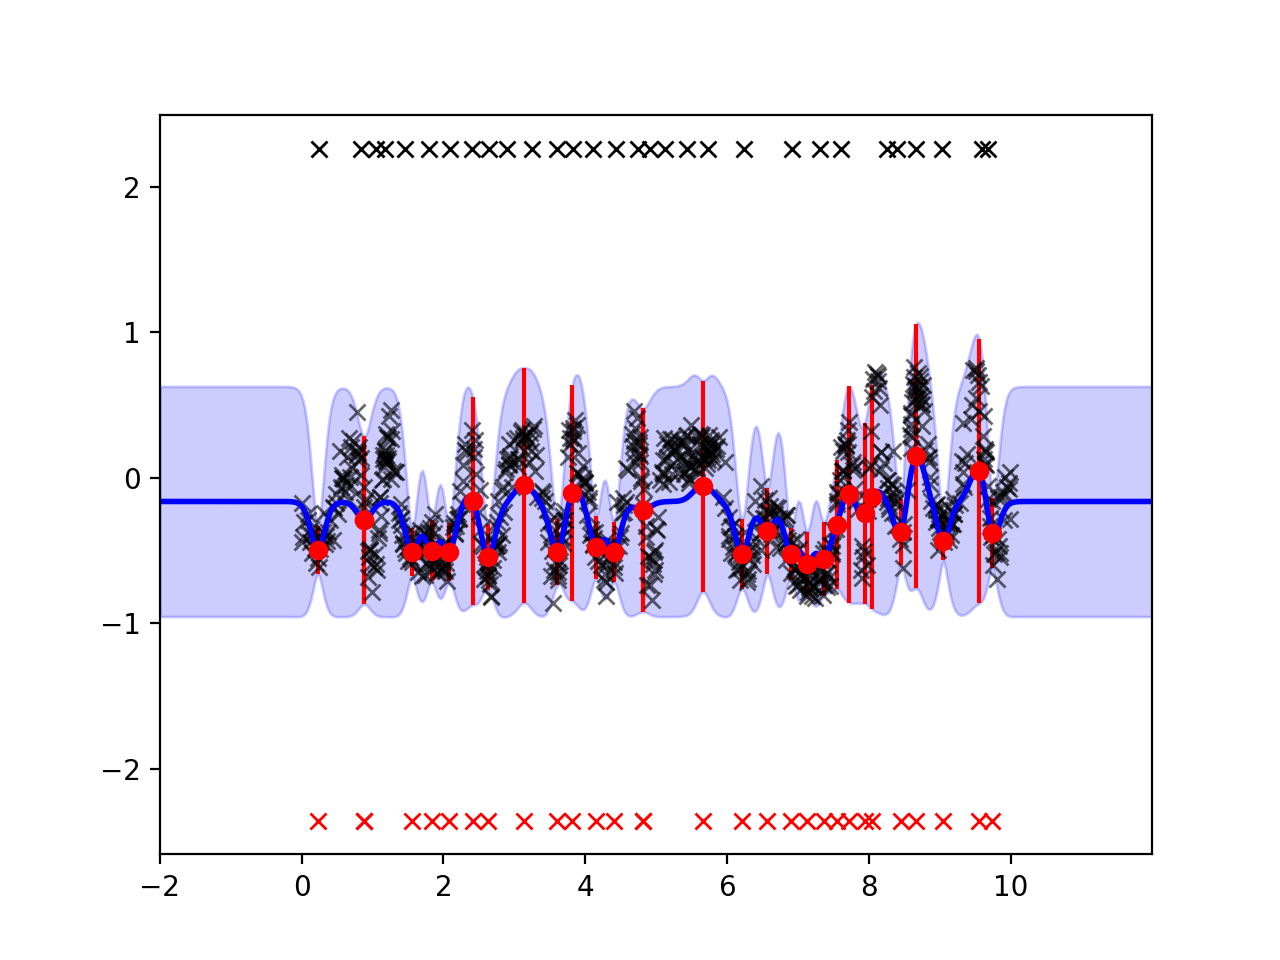

SGP greedy initialisation
Perform sparse GP regression
sf_0
sn
ls_0
eta2_0
zu_0
eta1_R_0


<IPython.core.display.Javascript object>


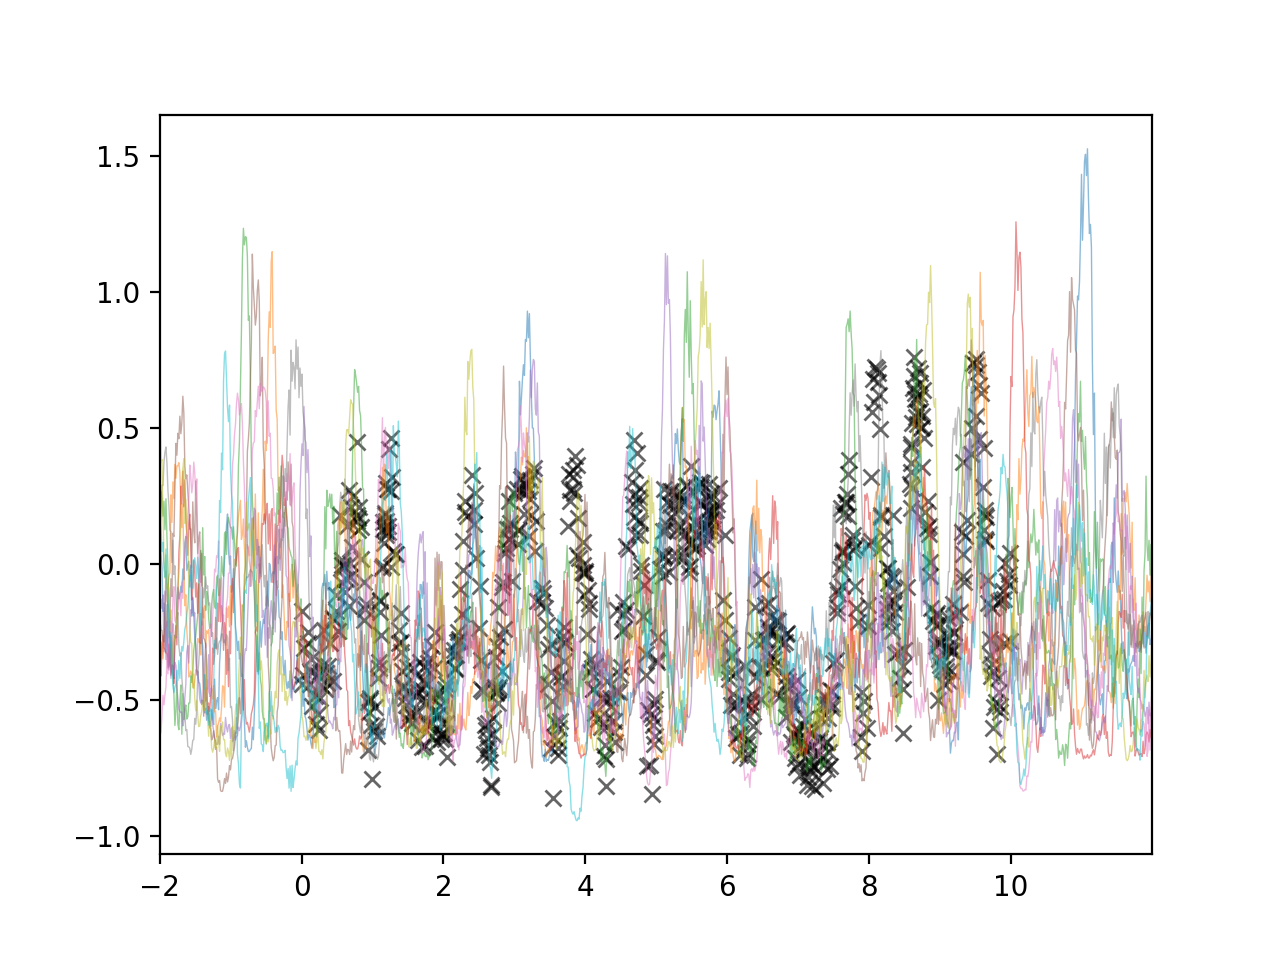

In [32]:
fig1 = DGP_figures(model, config_dict).plot()
fig2 = DGP_figures(model, config_dict).plot_sample()

### Hidden Layer

Default initialisation


<IPython.core.display.Javascript object>


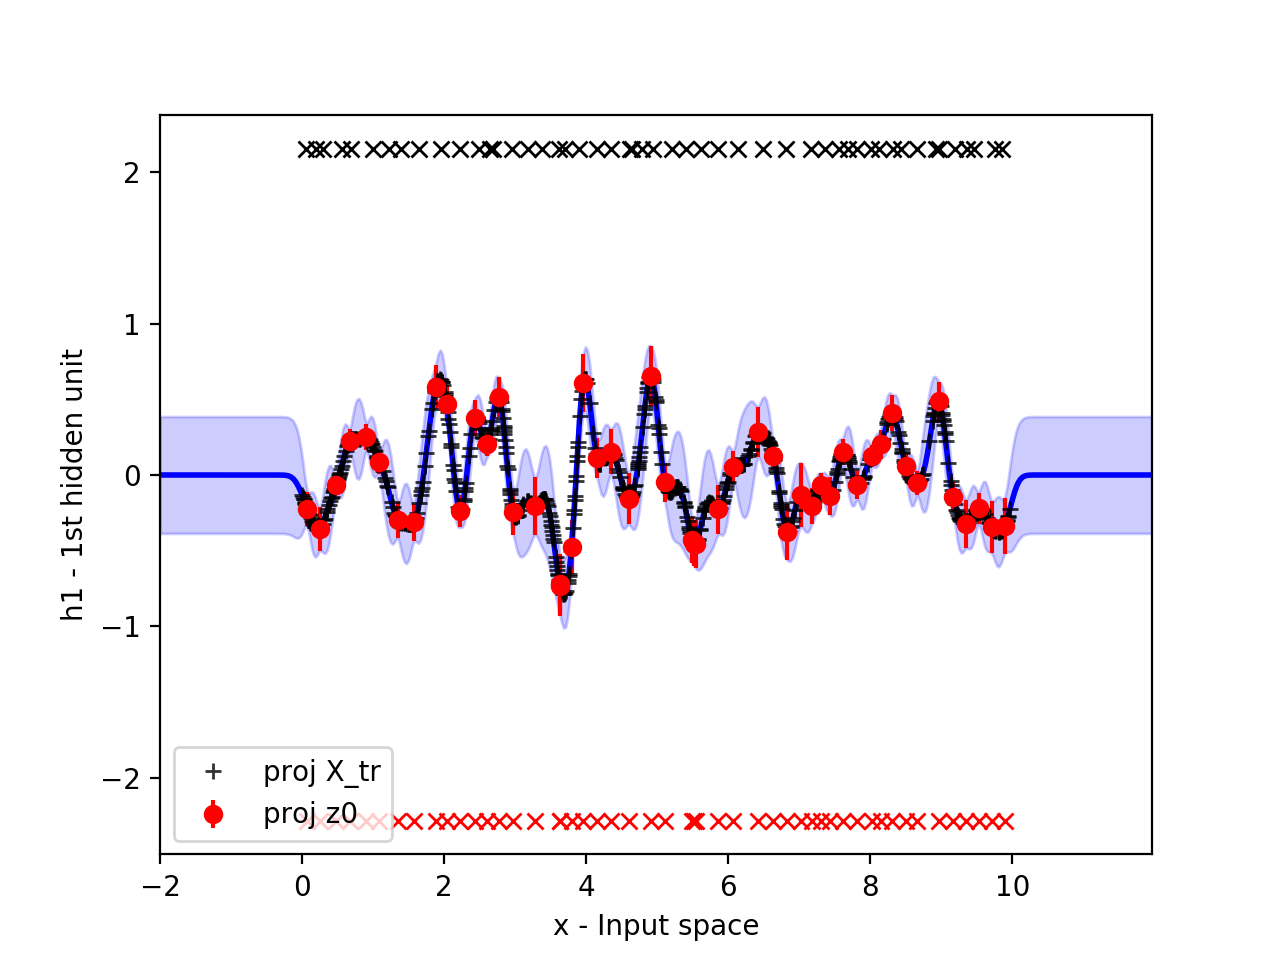

<IPython.core.display.Javascript object>


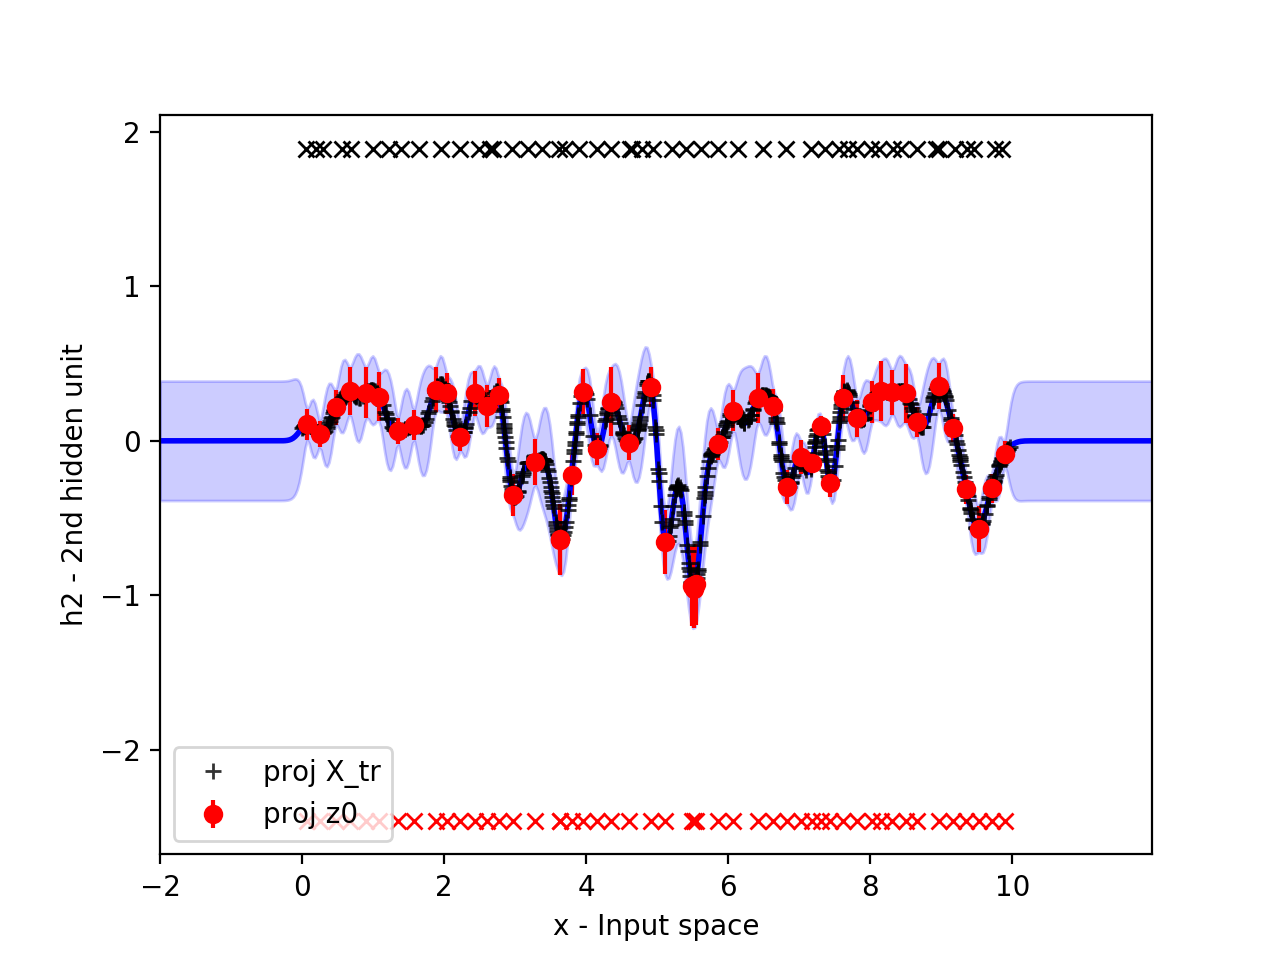

In [11]:
fig3 = DGP_figures(model, conf_dict=config_dict).plot_in_h()

Default initialisation


<IPython.core.display.Javascript object>


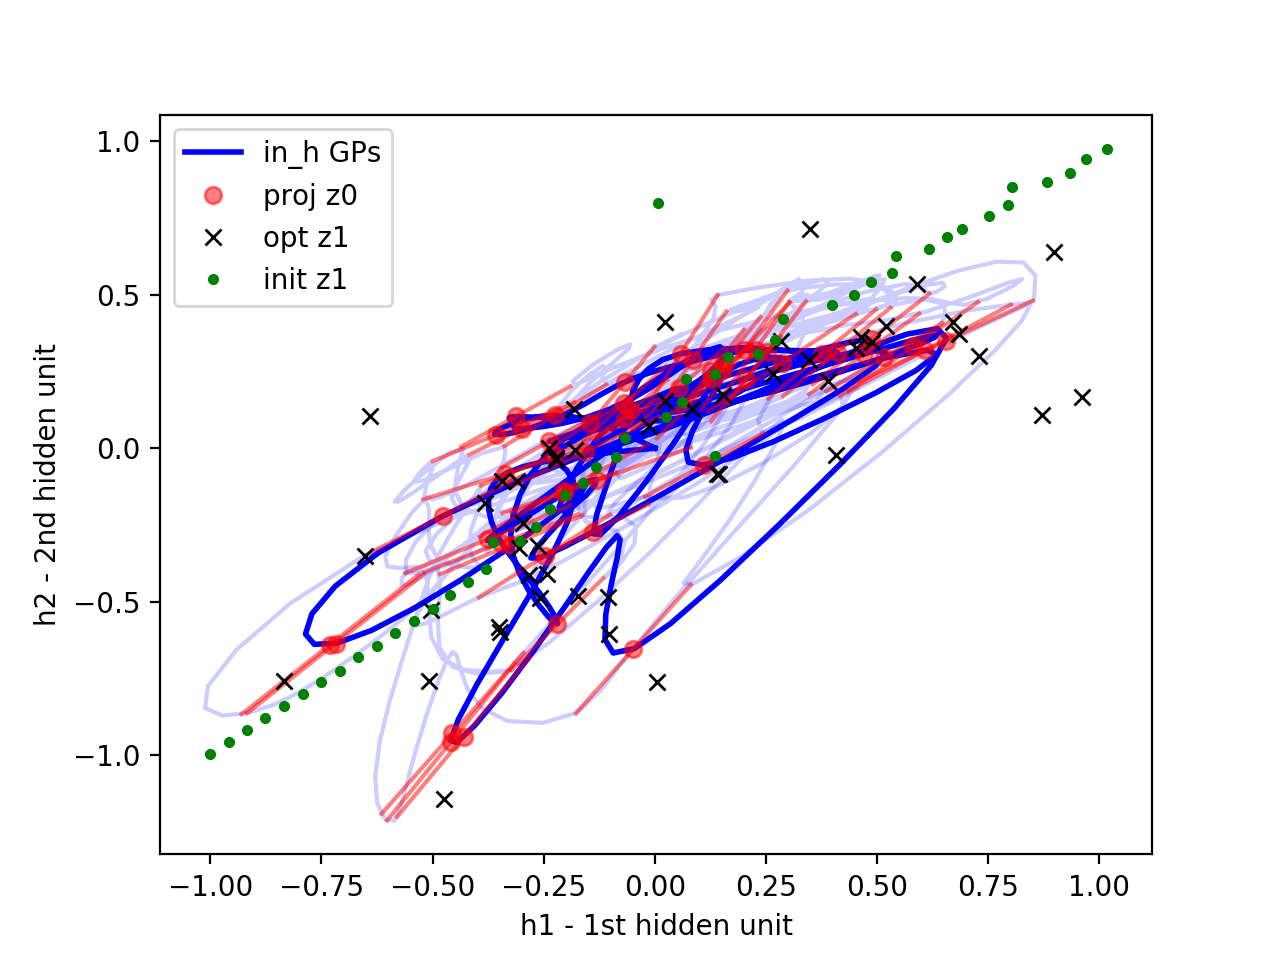

In [12]:
fig4 = DGP_figures(model, conf_dict=config_dict).plot_hidden()

Default initialisation


<IPython.core.display.Javascript object>


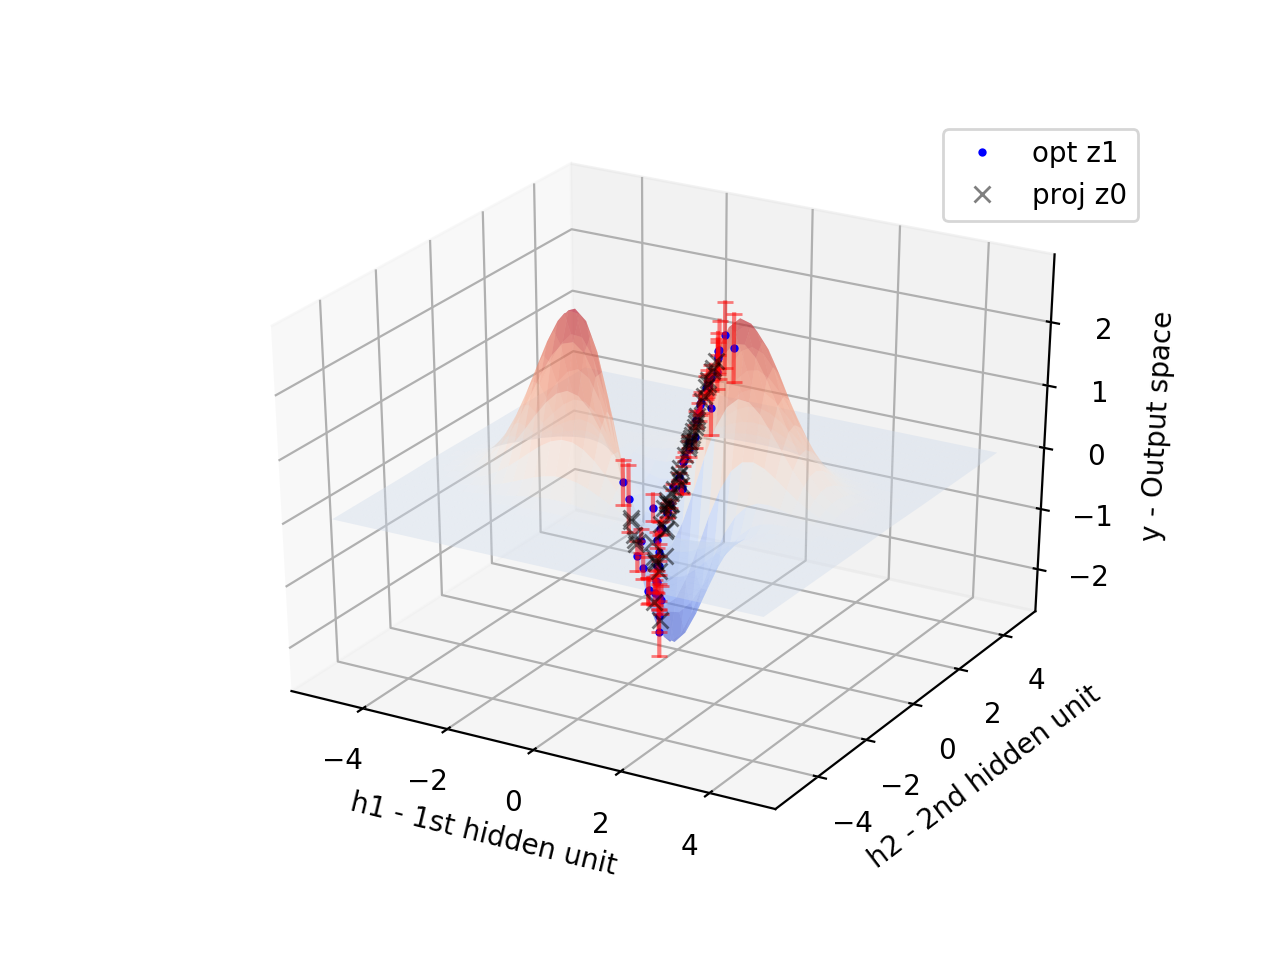

In [13]:
fig5 = DGP_figures(model, conf_dict=config_dict).plot_h_out()

### Initialisations

SGP greedy initialisation
Perform sparse GP regression
sf_0
sn
ls_0
eta2_0
zu_0
eta1_R_0


<IPython.core.display.Javascript object>


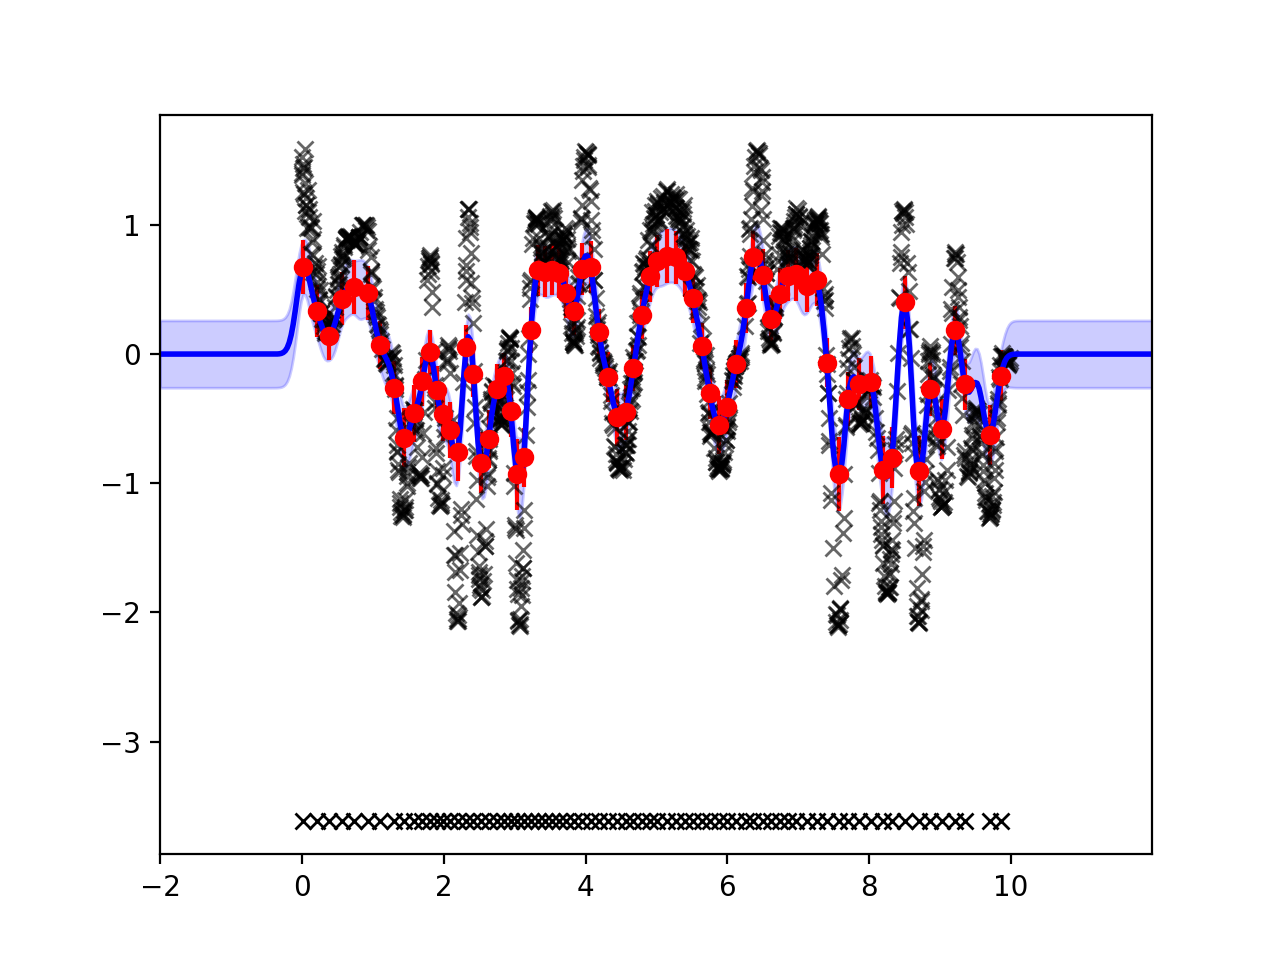

In [21]:
fig6 = DGP_figures(model, conf_dict=config_dict).plot_init()

SGP greedy initialisation
Perform sparse GP regression
sf_0
sn
ls_0
eta2_0
zu_0
eta1_R_0


<IPython.core.display.Javascript object>


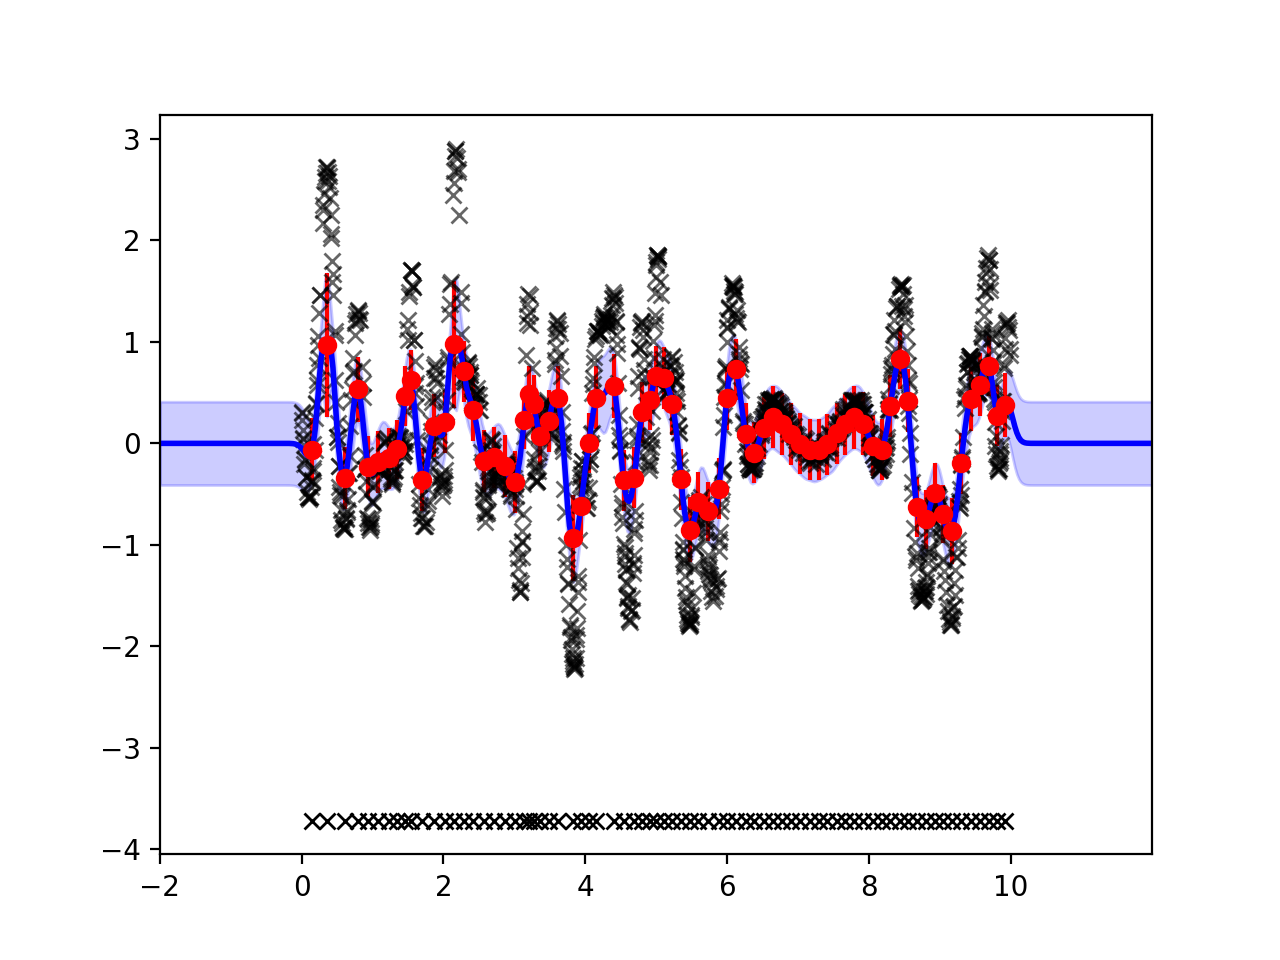

In [94]:
fig6 = DGP_figures(model, conf_dict=config_dict).plot_init()

# Baseline models

create full GP model and optimize ...
Test MSE =0.012, NLL =-0.803


<IPython.core.display.Javascript object>


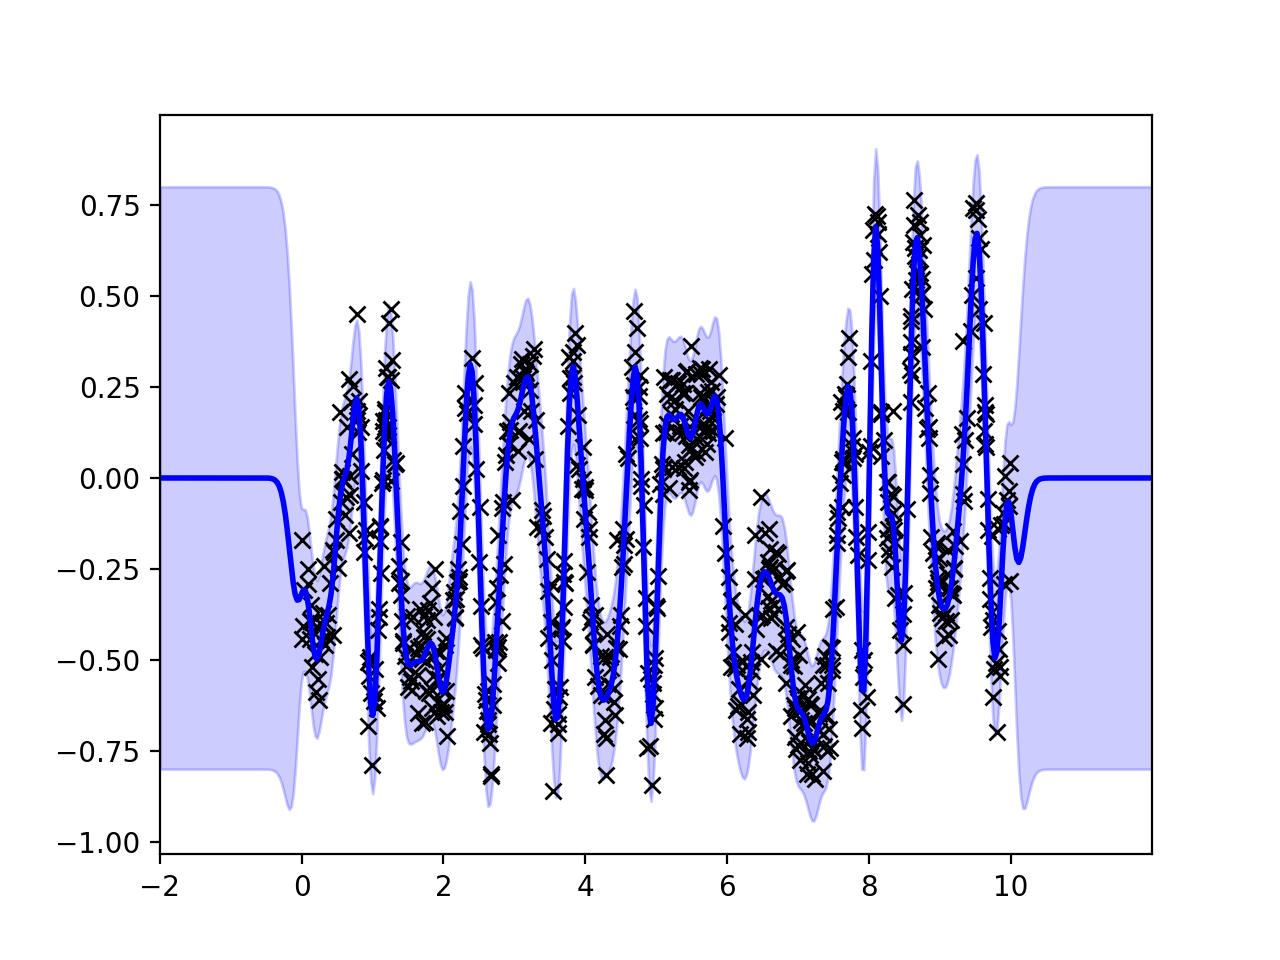

In [33]:
model_gp, df = full_GP_reg(X_train, y_train, X_test, y_test)
fig = GP_figures(model_gp).plot()

In [15]:
model_sgp = GPy.models.SparseGPRegression(X_train,y_train, kernel=GPy.kern.RBF(input_dim=1),num_inducing=50)
param = model_sgp.optimize('bfgs',messages=False)

In [16]:
zu = model_sgp.Z.values
sf = model_sgp.kern.variance.values
ls = model_sgp.kern.lengthscale.values
sn = model_sgp.likelihood.variance.values

In [17]:
def compute_kernel(lls, lsf, x, z):

    ls = np.exp(lls)
    sf = np.exp(lsf)

    if x.ndim == 1:
        x= x[ None, : ]

    if z.ndim == 1:
        z= z[ None, : ]

    r2 = cdist(x, z, 'seuclidean', V = ls)**2.0  
    k = sf * np.exp(-0.5*r2)
    return k
from scipy.spatial.distance import cdist
JITTER = 1e-5
M = 50
Dout = 1

Kuu = compute_kernel(2 * np.log(ls), 2 * np.log(sf), zu, zu)
# Kuu += np.diag(JITTER * np.ones((M, )))
Kuuinv = np.linalg.inv(Kuu)

In [18]:
print model_sgp.kern.K(zu)- Kuu

[[  1.00056757e-001   2.09137325e-251   2.58373358e-230 ...,
    3.25734980e-003   6.12440952e-055   2.22580786e-124]
 [  2.09137325e-251   1.00056757e-001   3.42721219e-002 ...,
    1.95506991e-291   4.35820532e-074   4.58659559e-024]
 [  2.58373358e-230   3.42721219e-002   1.00056757e-001 ...,
    1.11381667e-268   6.01399075e-063   4.40795604e-018]
 ..., 
 [  3.25734980e-003   1.95506991e-291   1.11381667e-268 ...,
    1.00056757e-001   3.21079592e-074   7.02528480e-153]
 [  6.12440952e-055   4.35820532e-074   6.01399075e-063 ...,
    3.21079592e-074   1.00056757e-001   5.13846560e-016]
 [  2.22580786e-124   4.58659559e-024   4.40795604e-018 ...,
    7.02528480e-153   5.13846560e-016   1.00056757e-001]]


In [19]:
Kuu = compute_kernel(2 * ls, 2 * sf, zu, zu)
Kuu += np.diag(JITTER * np.ones((M, )))
Kuuinv = np.linalg.inv(Kuu)

eta1_R = np.zeros((Dout, M * (M + 1) / 2))
eta2 = np.zeros((Dout, M))
for d in range(Dout):
    mu = np.linspace(-1, 1, M).reshape((M, 1))
    # mu += 0.01 * np.random.randn(M, 1)
    alpha = 0.5 * np.random.rand(M)
    # alpha = 0.1 * np.random.rand(M) # worse init obj = 44.2
    alpha = sn1 * np.random.rand(M)
    Su = np.diag(alpha)
    
    Suinv = np.diag(1 / alpha)
    theta2 = np.dot(Suinv, mu)
    # theta2 = np.dot(Suinv + Kuuinv, mu)
    theta1 = Suinv
    

    R = np.linalg.cholesky(theta1).T
    triu_ind = np.triu_indices(M)
    diag_ind = np.diag_indices(M)
    R[diag_ind] = np.log(R[diag_ind])
    eta1_d = R[triu_ind].reshape((M * (M + 1) / 2,))
    eta2_d = theta2.reshape((M,))
    eta1_R[d, :] = eta1_d
    eta2[d, :] = eta2_d

NameError: name 'sn1' is not defined

In [93]:
mu, Su = model_sgp.predict(zu, full_cov=True)
xx = np.linspace(0,10, 500).reshape(-1,1)
m, S = model_sgp.predict(xx)
Kuu = model_sgp.kern.K(zu)
Kuu += np.diag(1e-2* np.ones((M, )))
Kuuinv = np.linalg.inv(Kuu)
Suinv = np.linalg.inv(Su - np.diag(1e-1* np.ones((M, )))) 
theta1 = Suinv - Kuuinv + np.diag(1e-3* np.ones((M, )))
print np.min(np.linalg.eigvals(theta1))
np.linalg.cholesky(theta1).T

2.53898512968


array([[  7.44404435e+00,  -5.10264431e-13,  -4.33130118e-09, ...,
          3.74356367e-02,   1.17746155e-08,  -6.63065221e-12],
       [  0.00000000e+00,   7.00698153e+00,   4.72401406e-01, ...,
         -4.21039471e-10,  -7.27691052e-05,  -9.40852192e-03],
       [  0.00000000e+00,   0.00000000e+00,   7.11402422e+00, ...,
          5.25042220e-11,   4.90605441e-06,   1.04484510e-03],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          7.35007026e+00,  -2.39515823e-05,  -2.18202746e-07],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   7.46165582e+00,  -1.76264906e-02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   7.14911639e+00]])

eta1_R

In [33]:
eta1_R.shape

(1, 1275)

In [34]:
model_dgp = aep.SDGPR(X_train, y_train, 50, hidden_sizes=[2], lik='Gaussian')
params0 = model_dgp.optimise(method='adam', maxiter=1)

Default initialisation
iter 0 	 obj 41.159


In [35]:
for i in params0.keys():
    print i, params0[i].shape, params0[i]

zu_1 (50, 2) [[-1.001      -0.999     ]
 [-0.96018367 -0.96018367]
 [-0.91736735 -0.91936735]
 [-0.87655102 -0.87855102]
 [-0.83573469 -0.83773469]
 [-0.79491837 -0.79691837]
 [-0.75410204 -0.75610204]
 [-0.71328571 -0.71528571]
 [-0.67246939 -0.67446939]
 [-0.63165306 -0.63365306]
 [-0.59083674 -0.59283673]
 [-0.55002041 -0.55002041]
 [-0.51120408 -0.50920408]
 [-0.47038776 -0.46838776]
 [-0.42957143 -0.42757143]
 [-0.3887551  -0.3867551 ]
 [-0.34793878 -0.34593878]
 [-0.30712245 -0.30512245]
 [-0.26430612 -0.26430612]
 [-0.2234898  -0.2234898 ]
 [-0.18267347 -0.18467347]
 [-0.14185714 -0.14385714]
 [-0.10104082 -0.10304082]
 [-0.06022449 -0.06222449]
 [-0.01940816 -0.02140816]
 [ 0.02140816  0.01940816]
 [ 0.06222449  0.06022449]
 [ 0.10304082  0.10104082]
 [ 0.14385714  0.14185714]
 [ 0.18467347  0.18267347]
 [ 0.2254898   0.2234898 ]
 [ 0.26630612  0.26430612]
 [ 0.30712245  0.30512245]
 [ 0.34793878  0.34593878]
 [ 0.3887551   0.3867551 ]
 [ 0.42957143  0.42757143]
 [ 0.47038776  

In [36]:
params1 = model_dgp.optimise(method='adam', maxiter=100, reinit_hypers=False)

iter 0 	 obj 39.928
iter 50 	 obj 7.400


In [37]:
for i in params1.keys():
    print i, params1[i].shape

zu_1 (50, 2)
zu_0 (50, 1)
sf_0 (1,)
sf_1 (1,)
sn ()
ls_0 (1,)
ls_1 (2,)
eta2_1 (1, 50)
eta2_0 (2, 50)
eta1_R_1 (1, 1275)
eta1_R_0 (2, 1275)


In [80]:
zu.shape

(50, 1)

In [86]:
sn.shape

(1,)